In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot(x, y):
    plt.plot(x, y, 'ro')
    plt.show()


def mnk(x, y, m):
    m += 1

    b = np.empty(m)  # b
    g = np.empty((m, m))  # Г

    # заполняем b = (P^T)*P
    for j in range(m):
        b[j] = np.sum(y * x ** j)

    # заполняем Г = P*P
    for j in range(m):
        for k in range(m):
            g[j][k] = sum(x ** (k + j))

    best_coeffs = np.linalg.solve(g, b)

    def f(px):
        py = 0
        for i in range(m):
            py += best_coeffs[i] * px ** i
        return py

    return f, best_coeffs

In [30]:
x = np.array([0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0])
y = np.array([1.019, 1.4889, 2.2079, 3.0548, 3.8648, 4.2161, 5.1180, 5.7661, 6.6720, 7.1960, 7.8551])
n = len(x)

In [31]:
# считаем сигмы для определения лучшего m
sigmas = []
functions = []
coeffs = []
for m in range(n):
    f, coeff = mnk(x, y, m)
    sigma = np.sqrt((1 / (n - m)) * np.sum((f(x) - y) ** 2))
    sigmas.append(sigma)
    functions.append(f)
    coeffs.append(coeff)

<BarContainer object of 11 artists>

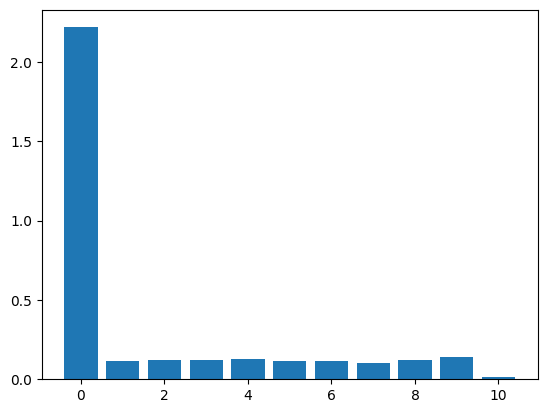

In [32]:
plt.bar(x=np.arange(len(sigmas)), height=sigmas)

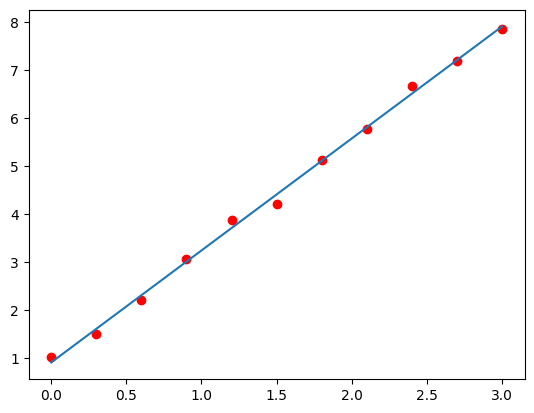

In [33]:
f, _ = mnk(x, y, 1)

plt.scatter(x, y, c='r')
plt.plot(x, f(x))

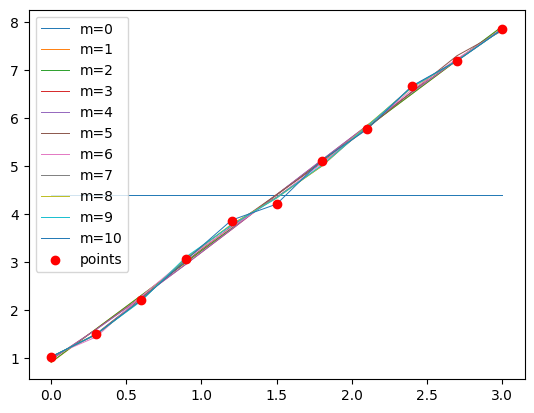

In [39]:
for f in functions:
    plt.plot(x, f(x), linewidth=0.7, label=f'm={functions.index(f)}')
plt.scatter(x, y, c='r', label='points', zorder=n+1)
plt.legend()